# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [434]:
# Libraries for data analysis and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# For data preparation
from sklearn.model_selection import train_test_split

# To scale the data
from sklearn.preprocessing import StandardScaler

# Decision Tree and Random Forest Classifier Models
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# For plotting the decision tree
from sklearn.tree import plot_tree

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Data Overview

- Observations
- Sanity checks

In [435]:
data = pd.read_csv("ExtraaLearn.csv") # read in the data
df = data.copy() # defining the data frame to be used as a copy of the original data

In [436]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [437]:
print("There are "+ str(df.shape[0]) +" rows and " + str(df.shape[1]) +" columns in the data set.") # print the number of rows and columns in the data

There are 4612 rows and 15 columns in the data set.


In [438]:
df.info() # get basic column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [439]:
df.isnull().sum() # ensuring that there are no null entries in the data

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

Observations:

There are 4612 rows and 15 columns in the data set. Of the 15 columns, 5 are numerical (4 columns of integers and 1 of floats) and 10 are objects. There are no null entries in the data set.

In [440]:
df.nunique() # Finds the number of unique entries in each column

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [441]:
df.describe().T # Displays some basic statistics for the numerical columns

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


Observations:

We can make some observations about the values in the data. We can see that the ID is unique for each customer and so we can drop it as it will not be useful. The page views per visit, time spent on website, age and number of website visits have the highest number of unique values, with all other categories being either binary or ternary.

In [442]:
df.drop(["ID"],axis=1,inplace=True); # Dropping the ID column as it does not contain useful information
df.head() # Ensuring the column has been dropped

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

#### Univariate analysis:
We can begin by looking at the different columns individually. We can use histograms to visualize the numerical variables and bar graphs to visualize the categorical variables.

In [443]:
df_num = df.select_dtypes(include=[np.number]) # Defines a smaller data frame of only the numerical columns
df_num.head(3) # Verifying that the correct columns are kept with the first three rows

,age,website_visits,time_spent_on_website,page_views_per_visit,status
0,57,7,1639,1.861,1
1,56,2,83,0.320,0
2,52,3,330,0.074,0


In [444]:
df_cat = df.select_dtypes(exclude=[np.number]) # Defines a smaller data frame of only the categorical columns
df_cat.head(3) # Verifying that the correct columns are kept with the first three rows

,current_occupation,first_interaction,profile_completed,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral
0,Unemployed,Website,High,Website Activity,Yes,No,Yes,No,No
1,Professional,Mobile App,Medium,Website Activity,No,No,No,Yes,No
2,Professional,Website,Medium,Website Activity,No,No,Yes,No,No


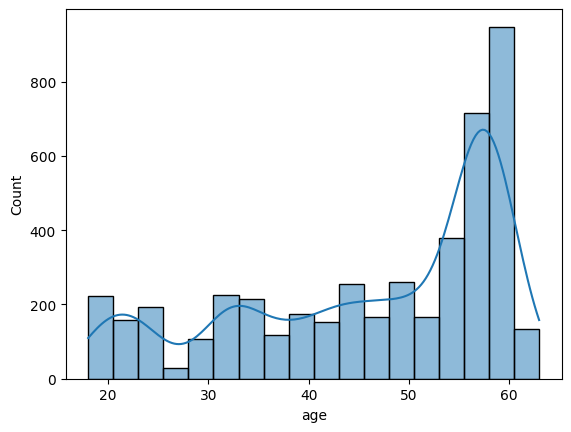

In [445]:
sns.histplot(data=df_num,x=df_num.columns[0],kde=True) # Plots the histogram of the age column
plt.show()

Observations:

The age histogram shows a strong peak between 55 and 60, and a mostly uniform number of leads between the ages of 20 and 50.

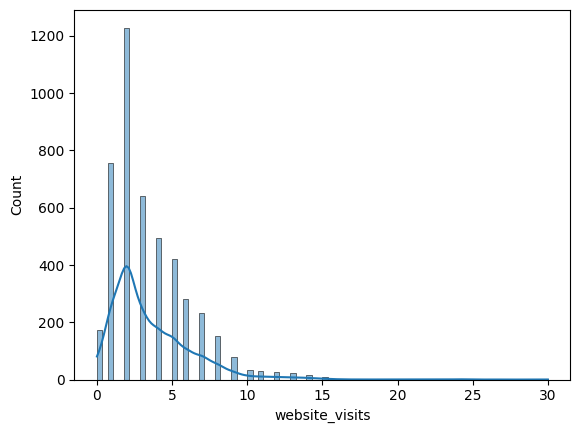

In [446]:
sns.histplot(data=df_num,x=df_num.columns[1],kde=True) # Plots the histogram of the website visits column
plt.show()

Observations:

We can see that the vast majority of leads visited the website between 0 and 5 times.

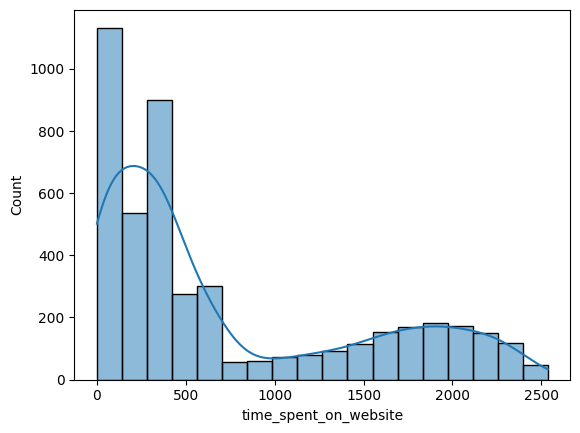

In [447]:
sns.histplot(data=df_num,x=df_num.columns[2],kde=True) # Plots the histogram of the time spent on website column
plt.show()

Observations:

We can see that the peak is between 0 and 500 seconds spent on the website, with an additional increase after 1500 seconds.

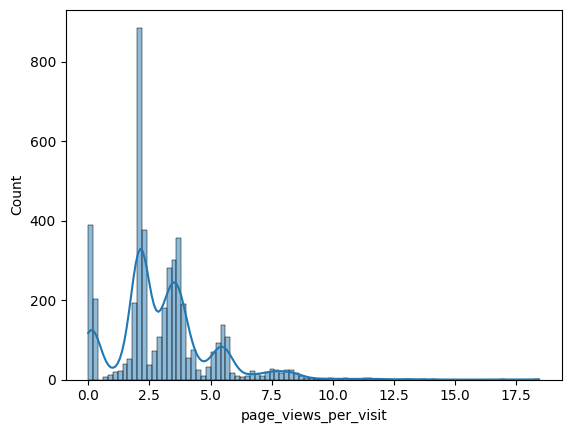

In [448]:
sns.histplot(data=df_num,x=df_num.columns[3],kde=True) # Plots the histogram of the page views per visit column
plt.show()

Observations:

There are four distinct peaks, close to 0, 2, 4 and 6 page views per visit.

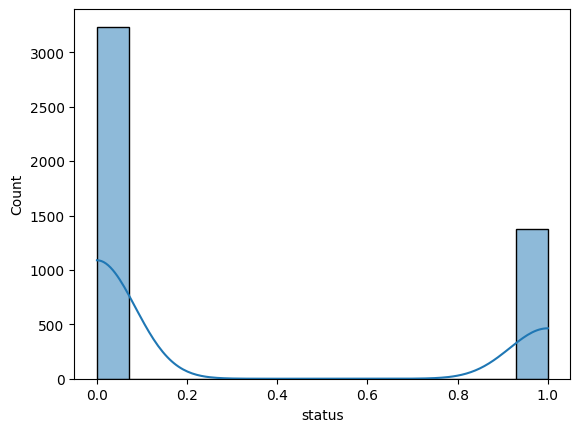

In [449]:
sns.histplot(data=df_num,x=df_num.columns[4],kde=True) # Plots the histogram of the status column
plt.show()

In [450]:
print("A total of " + str(df_num.loc[df_num["status"]==1].shape[0])+ " leads became paid customers, or " + str(round(100*df_num.loc[df_num["status"]==1].shape[0]/df_num.shape[0],3)) +" percent of the total.")

A total of 1377 leads became paid customers, or 29.857 percent of the total.


Observations:

We can see that the status category is purely a binary yes-no, depending on whether the lead was converted to a paid customer. We can see that 1377 leads became paid customers, or about 30% of the total.

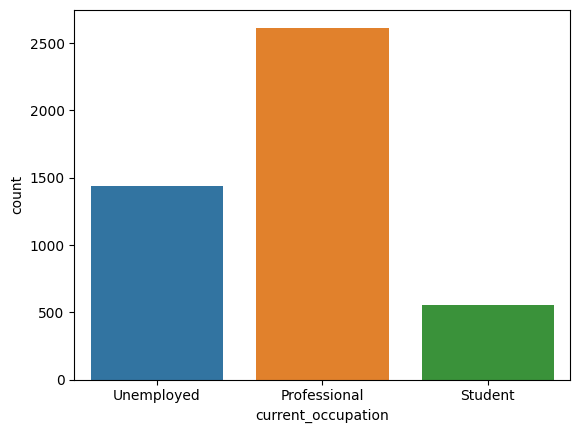

In [451]:
sns.countplot(data=df_cat,x=df_cat.columns[0],palette = "tab10") # Plots the bar graph of the professional occupation column
plt.show()

Observations:

We can see that the majority of the leads are professionals, followed by unemployed and student.

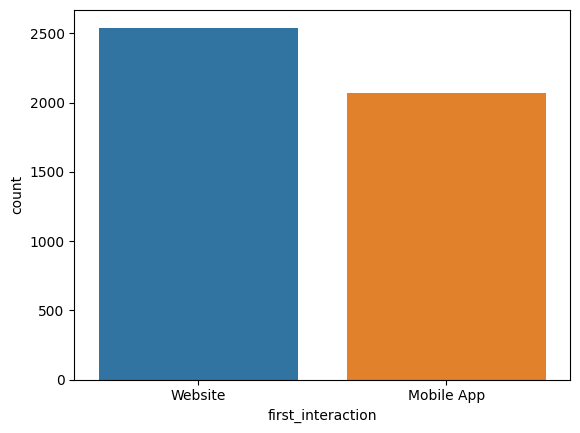

In [452]:
sns.countplot(data=df_cat,x=df_cat.columns[1],palette = "tab10") # Plots the bar graph of the firs interaction column
plt.show()

Observations:

We can see that most of the leads interacted with the website first, but the difference is not dramatic.

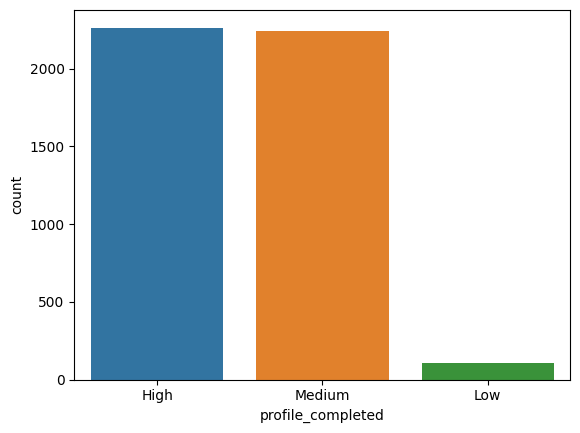

In [453]:
sns.countplot(data=df_cat,x=df_cat.columns[2],palette = "tab10") # Plots the bar graph of the profile completion column
plt.show()

Observations:

We can see that the vast majority of people have completed at least 50% of the profile, with about half completing over 75%.

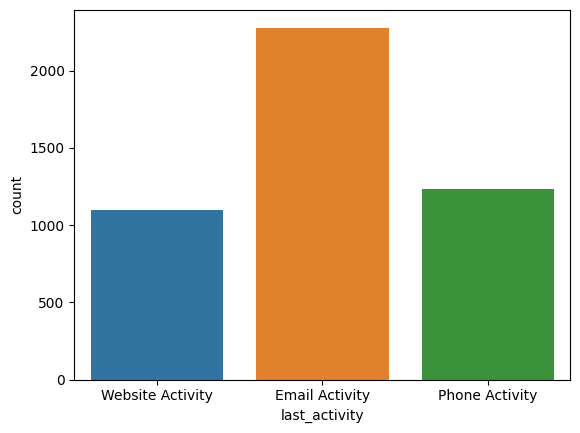

In [454]:
sns.countplot(data=df_cat,x=df_cat.columns[3],palette = "tab10") # Plots the bar graph of the last activity column
plt.show()

Observations:

We can see that most leads last activity was by email, with phone and website being roughly equal.

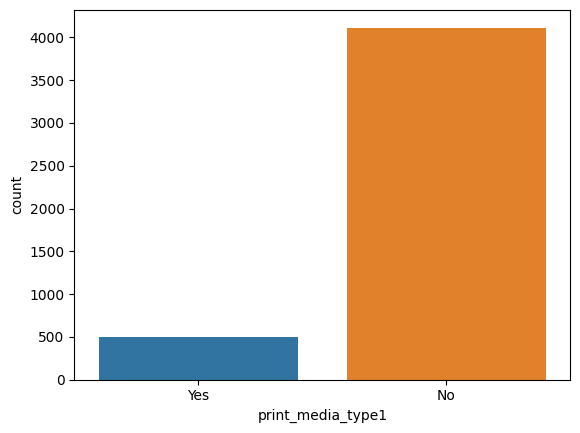

In [455]:
sns.countplot(data=df_cat,x=df_cat.columns[4],palette = "tab10",order=["Yes","No"]) # Plots the bar graph of the print media type 1 (newspaper) column
plt.show()

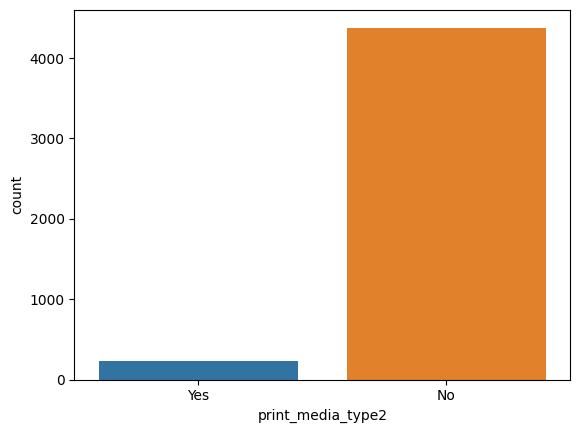

In [456]:
sns.countplot(data=df_cat,x=df_cat.columns[5],palette = "tab10",order=["Yes","No"]) # Plots the bar graph of the print media type 2 (magazine) column
plt.show()

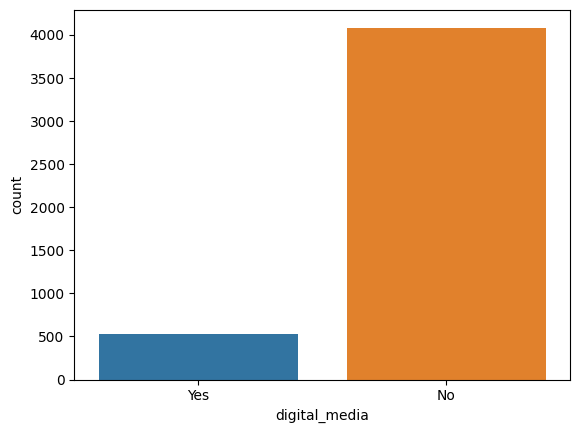

In [457]:
sns.countplot(data=df_cat,x=df_cat.columns[6],palette = "tab10",order=["Yes","No"]) # Plots the bar graph of the digital media column
plt.show()

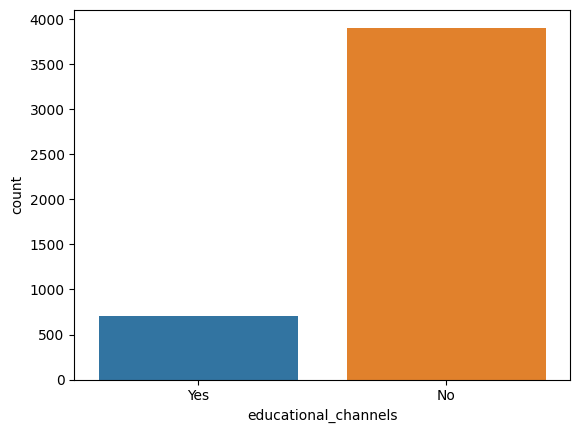

In [458]:
sns.countplot(data=df_cat,x=df_cat.columns[7],palette = "tab10",order=["Yes","No"]) # Plots the bar graph of the educational channels column
plt.show()

Observations:

We can see that of the different ways to learn about ExtraaLearn, the most popular was through the educational channels, followed by digital media, newspapers, and finally magazines.

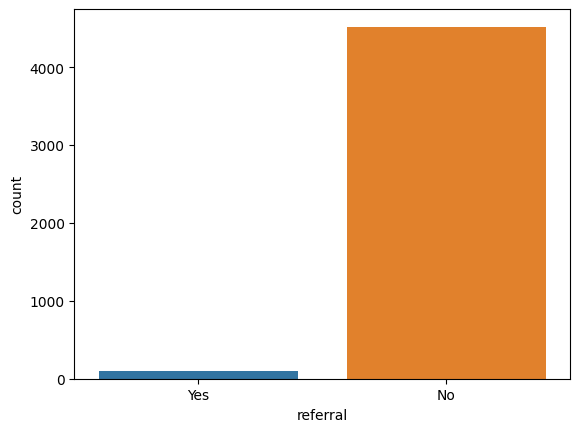

In [459]:
sns.countplot(data=df_cat,x=df_cat.columns[8],palette = "tab10",order=["Yes","No"]) # Plots the bar graph of the referral column
plt.show()

Observations:

We can see that the vast majority of leads are not referrals.

#### Multivariate Analysis:

Here, we can explore the relationships between different variables in the data set.

1. Occupation's effect on lead status

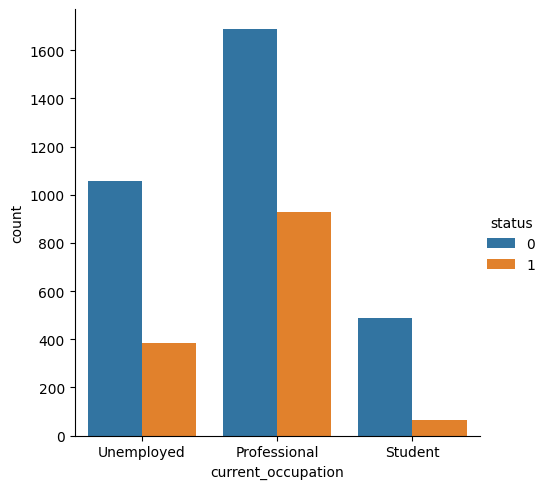

In [460]:
sns.catplot(data=df, x="current_occupation",hue="status",kind="count") # Plots the number of people in each occupation with a hue based on their status
plt.show()

In [461]:
co_status_table = pd.crosstab(df["current_occupation"],df["status"]) # Provides a table with the number of users in each occupation and their status values
co_status_table

status,0,1
current_occupation,,
Professional,1687,929
Student,490,65
Unemployed,1058,383


In [462]:
for i in range(co_status_table.shape[0]): # Loop to print the numbers of leads in each occupation and the percentage that become paid customers
    print("There are " + str(co_status_table.iloc[i,0]+co_status_table.iloc[i,1])+" total " + co_status_table.index[i] +" leads, of which " + str(round(co_status_table.iloc[i,1]/(co_status_table.iloc[i,0]+co_status_table.iloc[i,1])*100,2))+" percent are paid customers.")

There are 2616 total Professional leads, of which 35.51 percent are paid customers.
There are 555 total Student leads, of which 11.71 percent are paid customers.
There are 1441 total Unemployed leads, of which 26.58 percent are paid customers.


Observations:

We can see that professionals and unemployed leads are much more likely to become paid customers compared to students.

2. First channel of interaction's effect on lead status

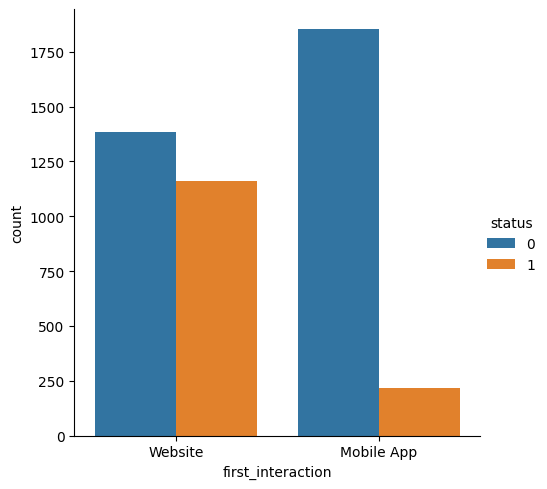

In [463]:
sns.catplot(data=df, x="first_interaction",hue="status",kind="count") # Plots the number of users for each first interaction with a hue based on their status
plt.show()

In [464]:
fi_status_table = pd.crosstab(df["first_interaction"],df["status"]) # Provides a table with the number of leads in each first interaction and their status values
fi_status_table

status,0,1
first_interaction,,
Mobile App,1852,218
Website,1383,1159


In [465]:
for i in range(fi_status_table.shape[0]): # Loop to print the numbers of leads for different first interaction and the percentage that become paid customers
    print("There are " + str(fi_status_table.iloc[i,0]+fi_status_table.iloc[i,1])+" total " + fi_status_table.index[i] +" leads, of which " + str(round(fi_status_table.iloc[i,1]/(fi_status_table.iloc[i,0]+fi_status_table.iloc[i,1])*100,2))+" percent are paid customers.")

There are 2070 total Mobile App leads, of which 10.53 percent are paid customers.
There are 2542 total Website leads, of which 45.59 percent are paid customers.


Observations:

We can see a dramatic difference in the dependence on first interactions, with users first using the website being much more likely to become customers compared to first using the mobile app.

3. Modes of interaction's effect on lead status

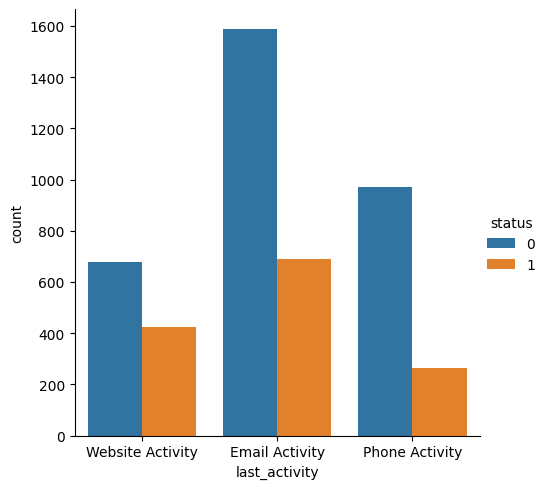

In [466]:
sns.catplot(data=df, x="last_activity",hue="status",kind="count") # Plots the number of people's first interaction with a hue based on their status
plt.show()

In [467]:
la_status_table = pd.crosstab(df["last_activity"],df["status"]) # Provides a table with the number of leads for each last activity and their status values
la_status_table

status,0,1
last_activity,,
Email Activity,1587,691
Phone Activity,971,263
Website Activity,677,423


In [468]:
for i in range(la_status_table.shape[0]): # Loop to print the numbers of leads for different last activities and the percentage that become paid customers
    print("There are " + str(la_status_table.iloc[i,0]+la_status_table.iloc[i,1])+" total " + la_status_table.index[i] +" leads, of which " + str(round(la_status_table.iloc[i,1]/(la_status_table.iloc[i,0]+la_status_table.iloc[i,1])*100,2))+" percent are paid customers.")

There are 2278 total Email Activity leads, of which 30.33 percent are paid customers.
There are 1234 total Phone Activity leads, of which 21.31 percent are paid customers.
There are 1100 total Website Activity leads, of which 38.45 percent are paid customers.


Observations:

We can see that even though fewer user have a last activity on the website as compared to phone, more of them become paid customers.

4. Advertising media effect on status

Newspaper advertisement:

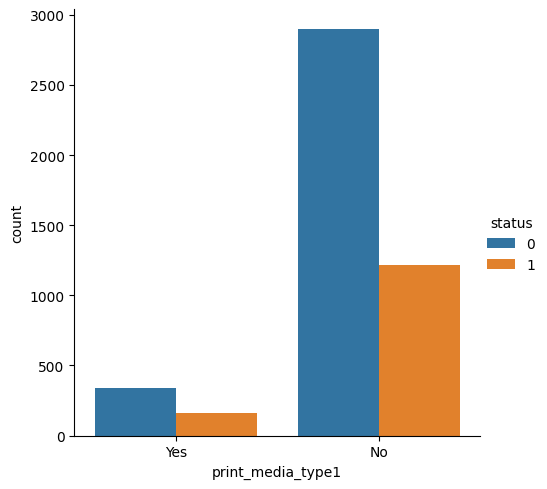

In [469]:
sns.catplot(data=df, x="print_media_type1",hue="status",kind="count",order=["Yes","No"]) # Plots the number of leads who saw a newspaper ad with a hue based on their status
plt.show()

In [470]:
pm1_status_table = pd.crosstab(df["print_media_type1"],df["status"]) # Provides a table with the number of leads that saw a newspaper ad and their status values
pm1_status_table

status,0,1
print_media_type1,,
No,2897,1218
Yes,338,159


In [471]:
# print the number of people who saw a newspaper ad and what percentage became paid customers
print("There are " + str(pm1_status_table.iloc[1,0]+pm1_status_table.iloc[1,1])+" total leads who saw a newspaper ad, of which " + str(round(pm1_status_table.iloc[1,1]/(pm1_status_table.iloc[1,0]+pm1_status_table.iloc[1,1])*100,2))+" percent are paid customers.")

There are 497 total leads who saw a newspaper ad, of which 31.99 percent are paid customers.


Magazine advertisement:

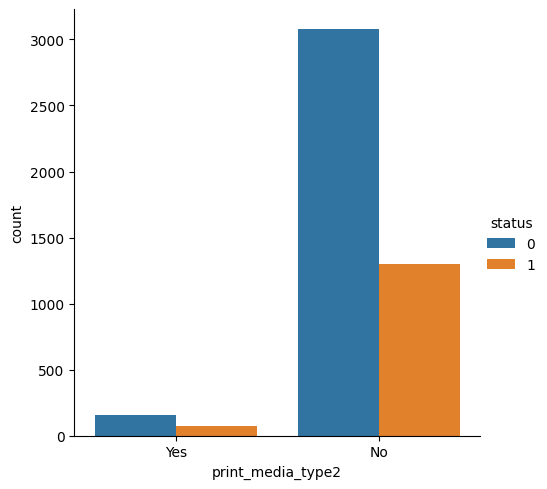

In [472]:
sns.catplot(data=df, x="print_media_type2",hue="status",kind="count",order=["Yes","No"]) # Plots the number of leads who saw a magazine ad with a hue based on their status
plt.show()

In [473]:
pm2_status_table = pd.crosstab(df["print_media_type2"],df["status"]) # Provides a table with the number of leads that saw a magazine ad and their status values
pm2_status_table

status,0,1
print_media_type2,,
No,3077,1302
Yes,158,75


In [474]:
# print the number of people who saw a magazine ad and what percentage became paid customers
print("There are " + str(pm2_status_table.iloc[1,0]+pm2_status_table.iloc[1,1])+" total leads who saw a magazine ad, of which " + str(round(pm2_status_table.iloc[1,1]/(pm2_status_table.iloc[1,0]+pm2_status_table.iloc[1,1])*100,2))+" percent are paid customers.")

There are 233 total leads who saw a magazine ad, of which 32.19 percent are paid customers.


In [475]:
print("A total of " + str(df.loc[(df["print_media_type1"]== "Yes") & (df["print_media_type2"]=="Yes")].shape[0])+ " leads saw both a newspaper and a magazine ad.") # check to see how many people saw both a newspaper and a magazine add

A total of 31 leads saw both a newspaper and a magazine ad.


Digital media advertisement:

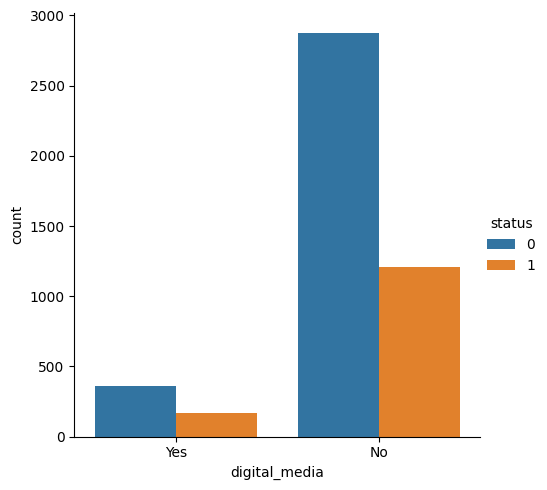

In [476]:
sns.catplot(data=df, x="digital_media",hue="status",kind="count",order=["Yes","No"]) # Plots the number of leads who saw a digital ad with a hue based on their status
plt.show()

In [477]:
dm_status_table = pd.crosstab(df["digital_media"],df["status"]) # Provides a table with the number of leads that saw a digital ad and their status values
dm_status_table

status,0,1
digital_media,,
No,2876,1209
Yes,359,168


In [478]:
# print the number of people who saw a digital ad and what percentage became paid customers
print("There are " + str(dm_status_table.iloc[1,0]+dm_status_table.iloc[1,1])+" total leads who saw a digital ad, of which " + str(round(dm_status_table.iloc[1,1]/(dm_status_table.iloc[1,0]+dm_status_table.iloc[1,1])*100,2))+" percent are paid customers.")

There are 527 total leads who saw a digital ad, of which 31.88 percent are paid customers.


Educational channels:

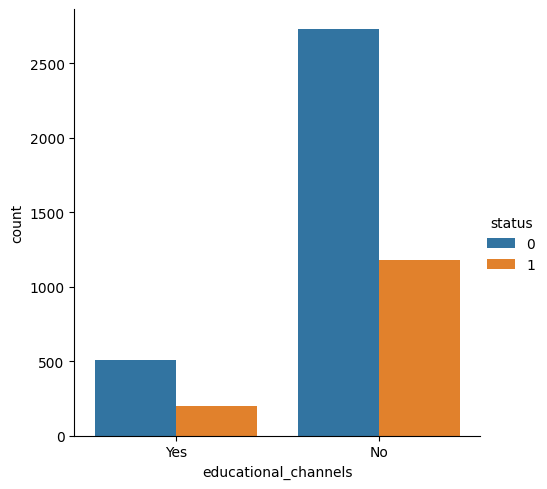

In [479]:
sns.catplot(data=df, x="educational_channels",hue="status",kind="count",order=["Yes","No"]) # Plots the number of leads who learnd about ExtraaLearn from an educational channel with a hue based on their status
plt.show()

In [480]:
ec_status_table = pd.crosstab(df["educational_channels"],df["status"]) # Provides a table with the number of leads who learned about ExtraaLearn through an educational channel and their status values
ec_status_table

status,0,1
educational_channels,,
No,2727,1180
Yes,508,197


In [481]:
# print the number of people who learned about ExtraaLeearn through an educational channel and what percentage became paid customers
print("There are " + str(ec_status_table.iloc[1,0]+ec_status_table.iloc[1,1])+" total leads who learned about ExtraaLearn through the educational channels, of which " + str(round(ec_status_table.iloc[1,1]/(ec_status_table.iloc[1,0]+ec_status_table.iloc[1,1])*100,2))+" percent are paid customers.")

There are 705 total leads who learned about ExtraaLearn through the educational channels, of which 27.94 percent are paid customers.


Referrals:

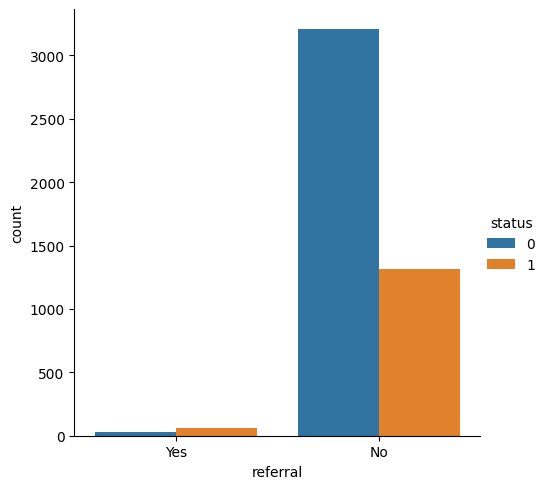

In [482]:
sns.catplot(data=df, x="referral",hue="status",kind="count",order=["Yes","No"]) # Plots the number of leads who were referred to ExtraaLearn with a hue based on their status
plt.show()

In [483]:
ref_status_table = pd.crosstab(df["referral"],df["status"]) # Provides a table with the number of leads who were referred to ExtraaLearn and their status values
ref_status_table

status,0,1
referral,,
No,3205,1314
Yes,30,63


In [484]:
# print the number of leads who who were referred to ExtraaLearn and what percentage became paid customers
print("There are " + str(ref_status_table.iloc[1,0]+ref_status_table.iloc[1,1])+" total leads who were referred to ExtraaLearn, of which " + str(round(ref_status_table.iloc[1,1]/(ref_status_table.iloc[1,0]+ref_status_table.iloc[1,1])*100,2))+" percent are paid customers.")

There are 93 total leads who were referred to ExtraaLearn, of which 67.74 percent are paid customers.


Observations:

All different kinds of advertising (newspaper, magazine, and digital) have a similar conversion rate, with digital and newspaper ads having a wider reach than magazines. The reach is even higher for educational channels, but the conversion percentage is lower relative to advertising. Lastly, the conversion rate for referrals is the best overall, but the number of total referrals is quite small.

5. Profile completion's effect on lead status

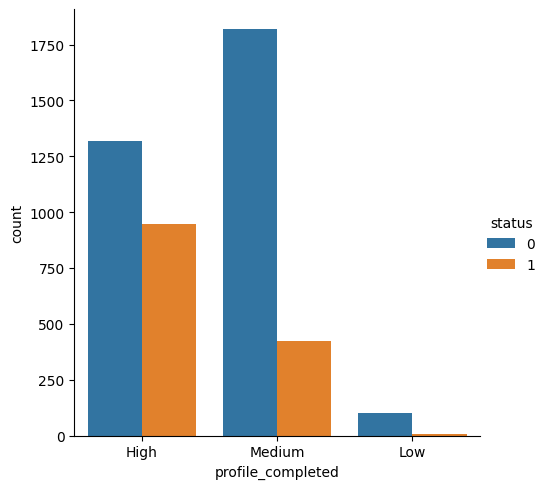

In [485]:
sns.catplot(data=df, x="profile_completed",hue="status",kind="count") # Plots the number of the lead's level of profile completion with a hue based on their status
plt.show()

In [486]:
prof_status_table = pd.crosstab(df["profile_completed"],df["status"]) # Provides a table with the number of the lead's level of profile completion with a hue based on their status
prof_status_table

status,0,1
profile_completed,,
High,1318,946
Low,99,8
Medium,1818,423


In [487]:
for i in range(prof_status_table.shape[0]): # Loop to print the numbers of leads for different last activities and the percentage that become paid customers
    print("There are " + str(prof_status_table.iloc[i,0]+prof_status_table.iloc[i,1])+" total leads with a " + prof_status_table.index[i] +" level of profile completion, of which " + str(round(prof_status_table.iloc[i,1]/(prof_status_table.iloc[i,0]+prof_status_table.iloc[i,1])*100,2))+" percent are paid customers.")

There are 2264 total leads with a High level of profile completion, of which 41.78 percent are paid customers.
There are 107 total leads with a Low level of profile completion, of which 7.48 percent are paid customers.
There are 2241 total leads with a Medium level of profile completion, of which 18.88 percent are paid customers.


Observations:

We can see that users the have completed more of their profile are more likely to become customers.

6. Correlation between the numerical variables:

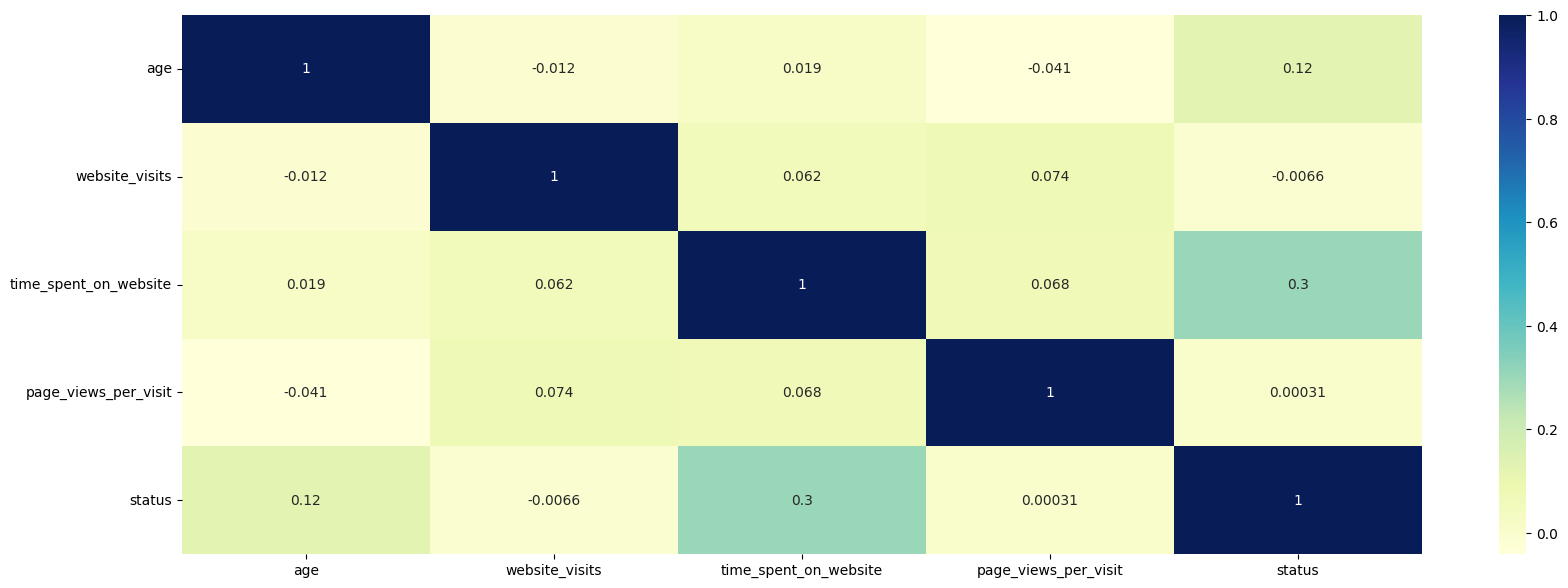

In [488]:
# We can also plot all the correlations between the numerical variables
plt.figure(figsize=(20,7)) # Makes the plot bigger so there is space for all the labels
sns.heatmap(df_num.corr(),annot=True,cmap='YlGnBu')
plt.show()

Observations:

We can see that the most positively correlated variables are age and status as well as time spent on the website and status.

7. Age and status relationship:

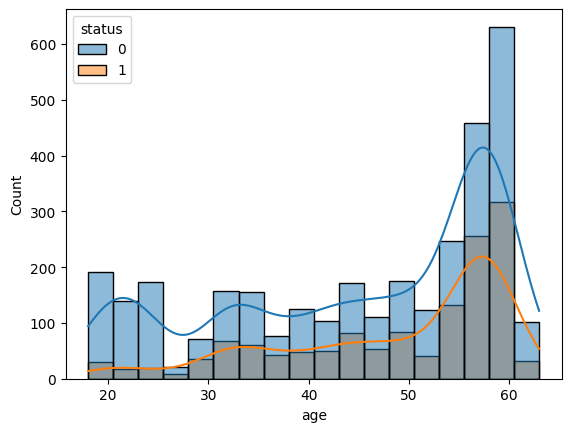

In [489]:
# A histogram plot for the age distribution with hue for the status
sns.histplot(data=df,x="age",hue = "status",palette="tab10",kde=True)
plt.show()

Observations:

We can see that users under 30 years old are relatively less likely to become customers compared to other ages.

8. Time spent on website and status relationship:

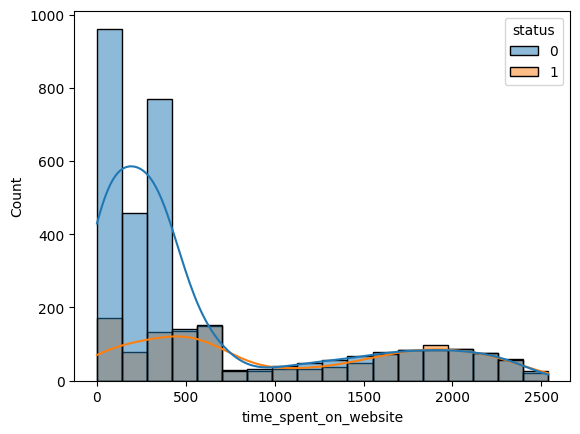

In [490]:
# A histogram plot for the time spent on website distribution with hue for the status
sns.histplot(data=df,x="time_spent_on_website",hue = "status",palette="tab10",kde=True)
plt.show()

Observations:

We can see that beyond 1000 seconds the distribution of customers and leads are essentially the same.

**Answers**
1. We can see that students are least likely to become customers and professionals are most likely.
2. We can see that if the first contact is made through the website, the lead is far more likely to become a customer.
3. If the last interaction is made through the website, the lead is more likely to become a customer.
4. Referrals have the highest rate of conversion, but are the lowest number of total reach. Other kinds of advertising have simmilar conversion rates.
5. Having more details in the profile increases the likelihood that a lead becomes a customer.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

We need to prepare the data for modeling. This involves encoding the categorical features as well as splitting the data into training set and testing set.

In [491]:
df_num.head() # recalling the numeric part of the full dataframe defined above

,age,website_visits,time_spent_on_website,page_views_per_visit,status
0,57,7,1639,1.861,1
1,56,2,83,0.320,0
2,52,3,330,0.074,0
3,53,4,464,2.057,1
4,23,4,600,16.914,0


In [492]:
df_cat.head() # recalling the categorical part of the full dataframe defined above

,current_occupation,first_interaction,profile_completed,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral
0,Unemployed,Website,High,Website Activity,Yes,No,Yes,No,No
1,Professional,Mobile App,Medium,Website Activity,No,No,No,Yes,No
2,Professional,Website,Medium,Website Activity,No,No,Yes,No,No
3,Unemployed,Website,High,Website Activity,No,No,No,No,No
4,Student,Website,High,Email Activity,No,No,No,No,No


In [493]:
df_prepared = pd.get_dummies(data = df, columns = df_cat.columns.tolist(), drop_first = True) # defines a new dataframe, where the categorical variables have been encoded

In [494]:
df_prepared.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,1,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.320,0,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.074,0,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.057,1,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.914,0,True,False,True,False,False,False,False,False,False,False,False,False


We can now split the target variable from the rest of the data and define the training and testing splits.

In [495]:
# Splitting the target variable (status)
X = df_prepared.drop(["status"],axis=1)
Y = df_prepared.status

In [496]:
# Splitting the data into a 70:30 train to test ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## Building a Decision Tree model

We can now use the decision tree classifier function on the data.

In [497]:
# Starting with the simplest model using the training data
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

## Model Performance evaluation and improvement

The types of error that the decision tree model can make are:
1. When a lead who would become a paid customer is labeled as a lead who will not - false negative
2. When a lead who would not become a paid customer is labeled as a lead who will - false positive

The first kind of error would lose a customer to ExtraaLearn directly, while the second could potentially lead to wasted resources. Therefore, the first kind of error is more important and the metric we need to focus on to minimize false negatives is the recall.

We can find the predictions for the training data and test data and then use classification report and confusion matrix to evaluate the model.

#### Training data:

In [498]:
Y_train_predict = dt.predict(X_train)

In [499]:
# Print the classification report
print(classification_report(Y_train,Y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



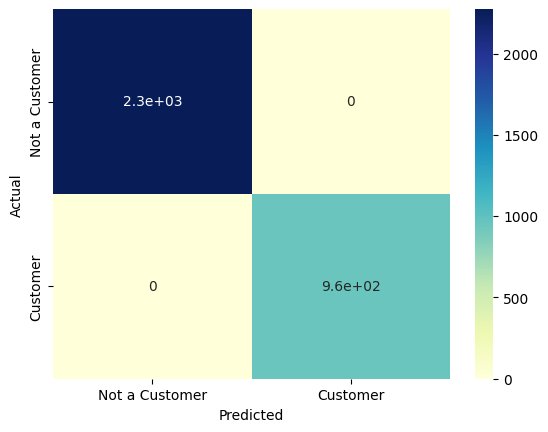

In [500]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(Y_train,Y_train_predict),annot=True,cmap='YlGnBu',xticklabels = ['Not a Customer', 'Customer'], yticklabels = ['Not a Customer', 'Customer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Observations:

The model has perfect performance on the training dataset.

#### Test data:

In [501]:
Y_test_predict = dt.predict(X_test)

In [502]:
# Print the classification report
print(classification_report(Y_test,Y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       962
           1       0.69      0.69      0.69       422

    accuracy                           0.81      1384
   macro avg       0.77      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



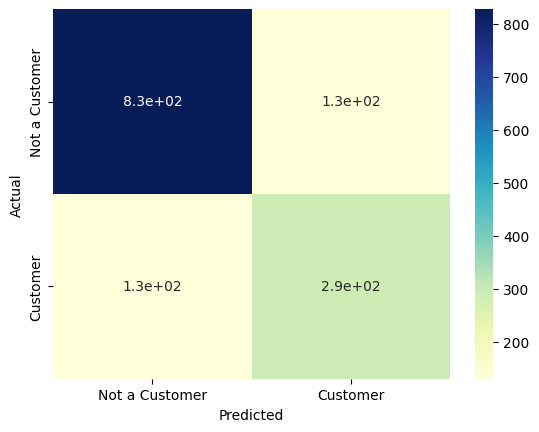

In [503]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(Y_test,Y_test_predict),annot=True,cmap='YlGnBu',xticklabels = ['Not a Customer', 'Customer'], yticklabels = ['Not a Customer', 'Customer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The model performs much worse on the test data set, with a recall of 0.69 compared to 1 for the training data. This means that the model is overfitting the training data.

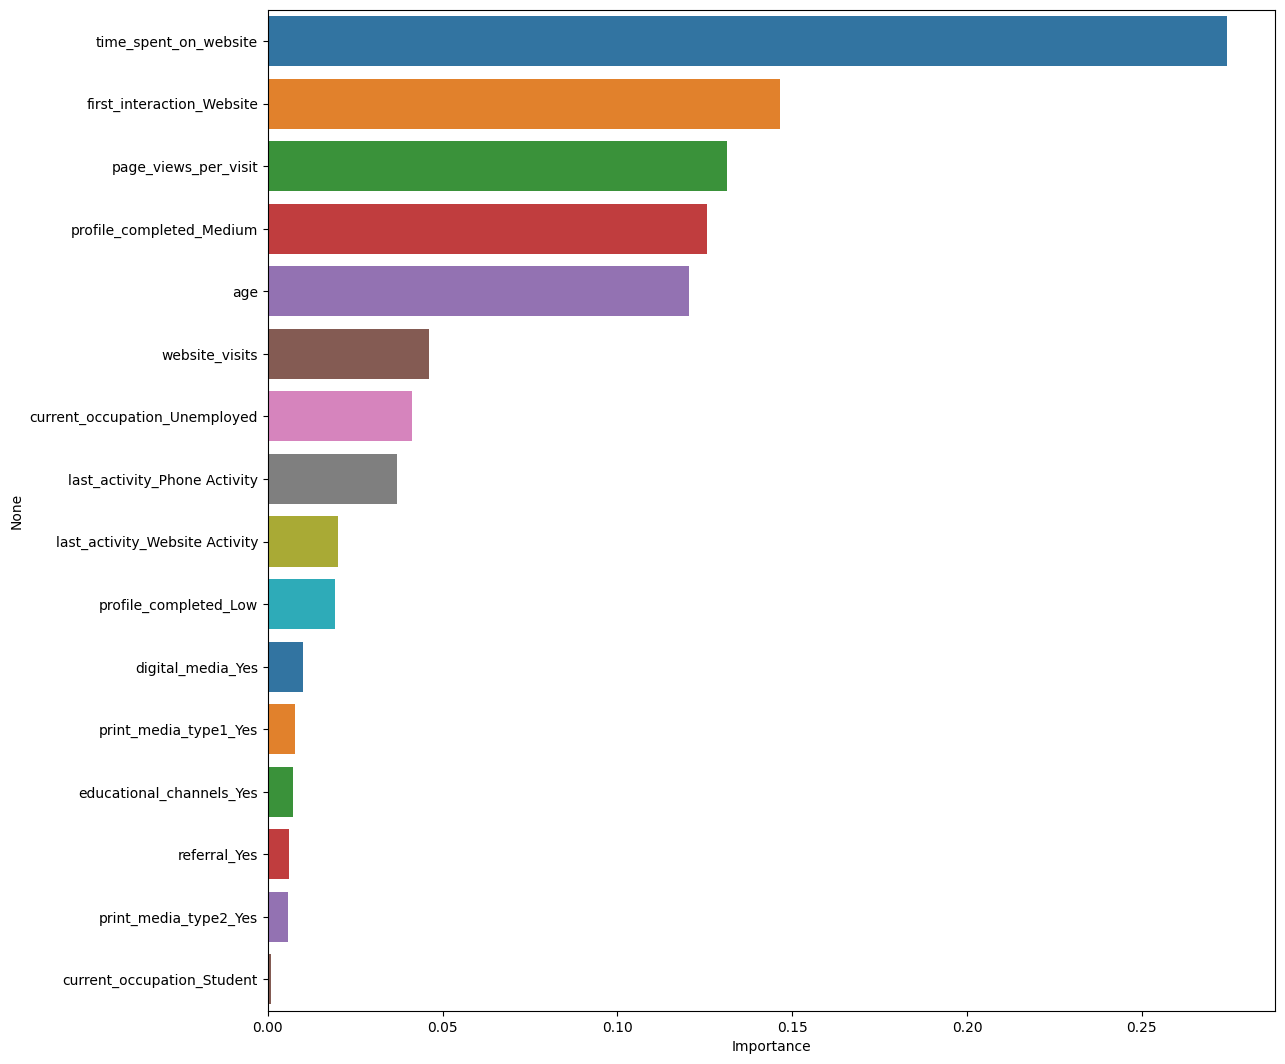

In [504]:
# We can see which features are most important to the model
importances = dt.feature_importances_
importance_df = pd.DataFrame(importances, index = X.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index, palette="tab10")
plt.show()

Observations:

We can see that the time spent on website is the most important feature, followed by first interaction being on the website and page views per visit.

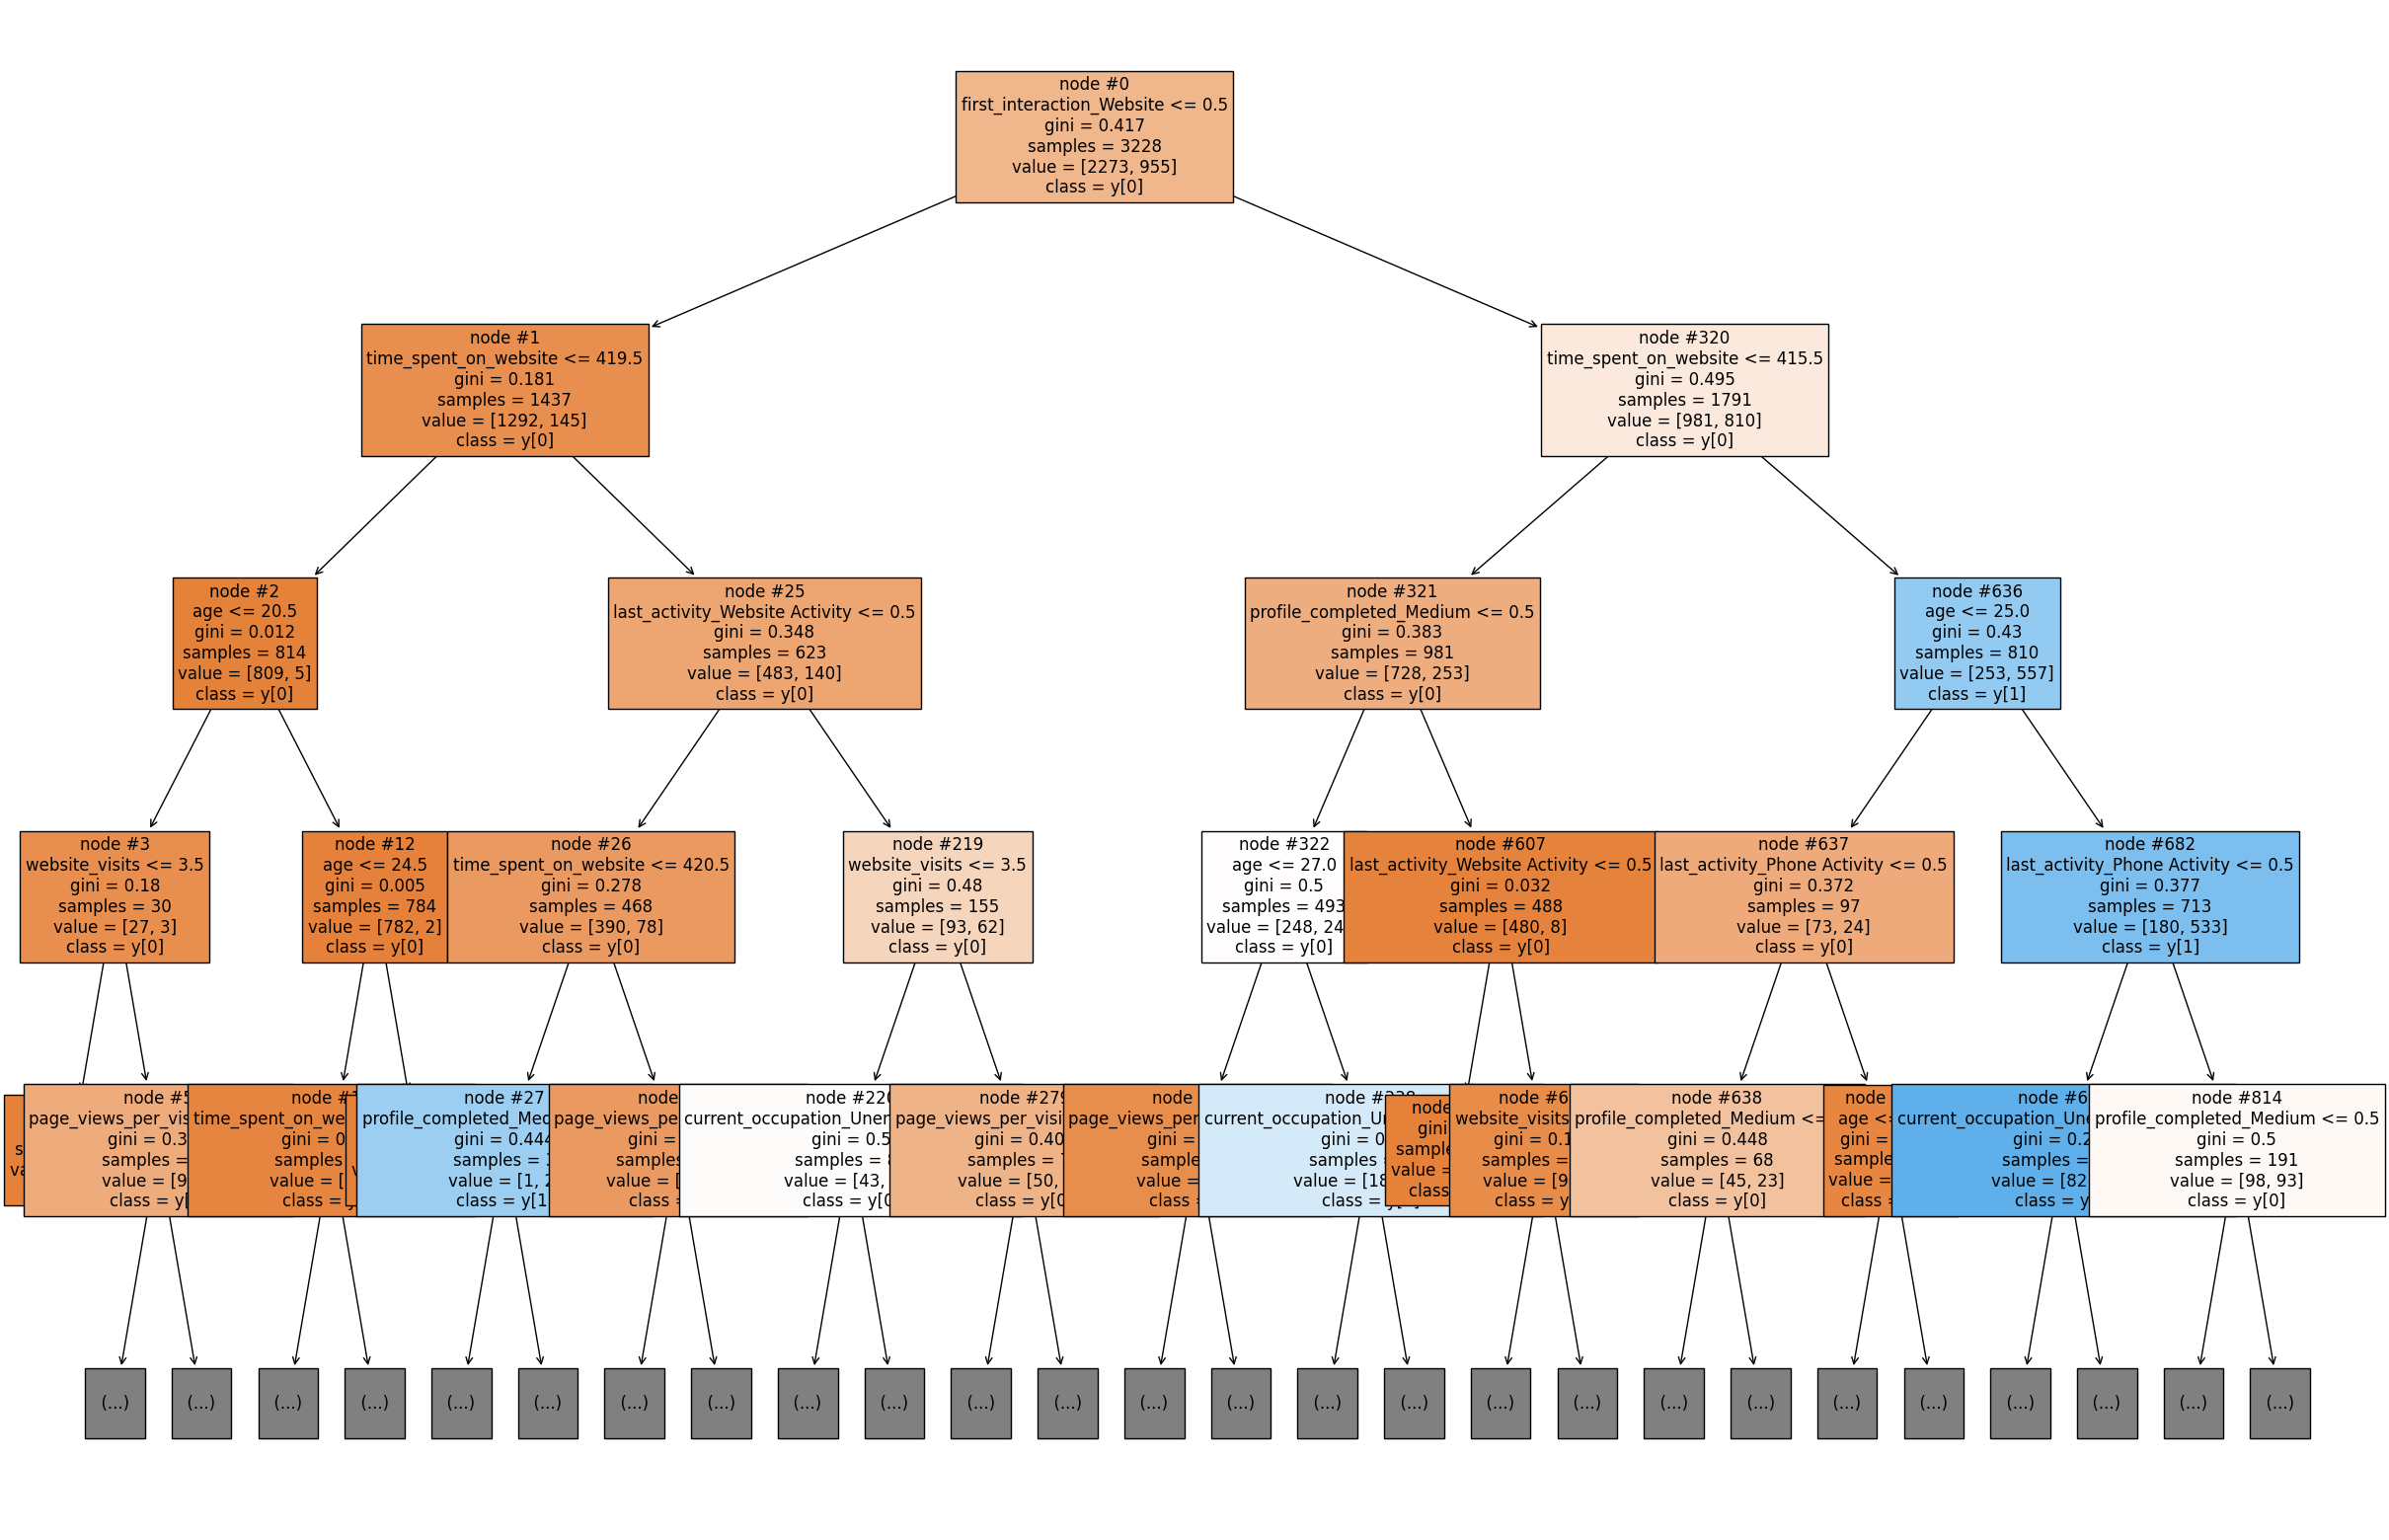

In [505]:
# Plot the decision tree model
plt.figure(figsize = (30, 20))
plot_tree(dt, max_depth = 4, feature_names = X.columns.tolist(), filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

We can see that the the decision tree is quite large with many nodes, again suggesting overfitting.

### Model Parameter tuning

We can do hyperparameter tuning to try to prune the decision tree, reducing the overfitting and improving the performance on the test data. To do this we can use GridSearch.

In [506]:
# Choose the type of classifier
dt_tuned = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1) # set the class weight to the proportion of the positive results in the data and weighing more heavily the positive results

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1) # since we are trying to minimize false negatives we can optimize the recall

# Run the grid search
gridCV = GridSearchCV(dt_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, Y_train)

# Set the classifier to the best combination of parameters
dt_tuned = gridCV.best_estimator_

We can again check the model on the training data:

In [507]:
Y_train_predict_tuned = dt_tuned.predict(X_train)

In [508]:
# Print the classification report
print(classification_report(Y_train,Y_train_predict_tuned))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



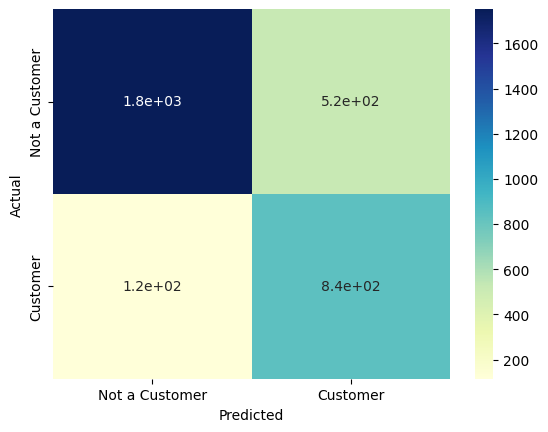

In [509]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(Y_train,Y_train_predict_tuned),annot=True,cmap='YlGnBu',xticklabels = ['Not a Customer', 'Customer'], yticklabels = ['Not a Customer', 'Customer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Clearly, the fitting reduced the overfitting of the training data, and now we have a recall value of 0.88 on the training data. Next we can check the results on the test data.

In [510]:
Y_test_predict_tuned = dt_tuned.predict(X_test)

In [511]:
# Print the classification report
print(classification_report(Y_test,Y_test_predict_tuned))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



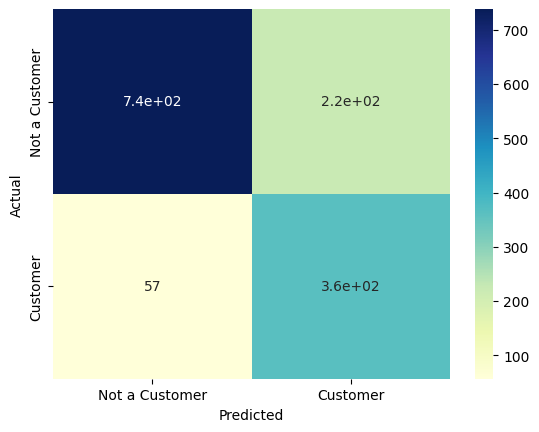

In [512]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(Y_test,Y_test_predict_tuned),annot=True,cmap='YlGnBu',xticklabels = ['Not a Customer', 'Customer'], yticklabels = ['Not a Customer', 'Customer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We can see that the tuned model has a much better recall on the test data compared to the starting model, with a value of 0.86 compared to 0.69. It also performs comparatively on the train data and test data.

Finally, we can again look at the important features of the model and plot the decision tree.

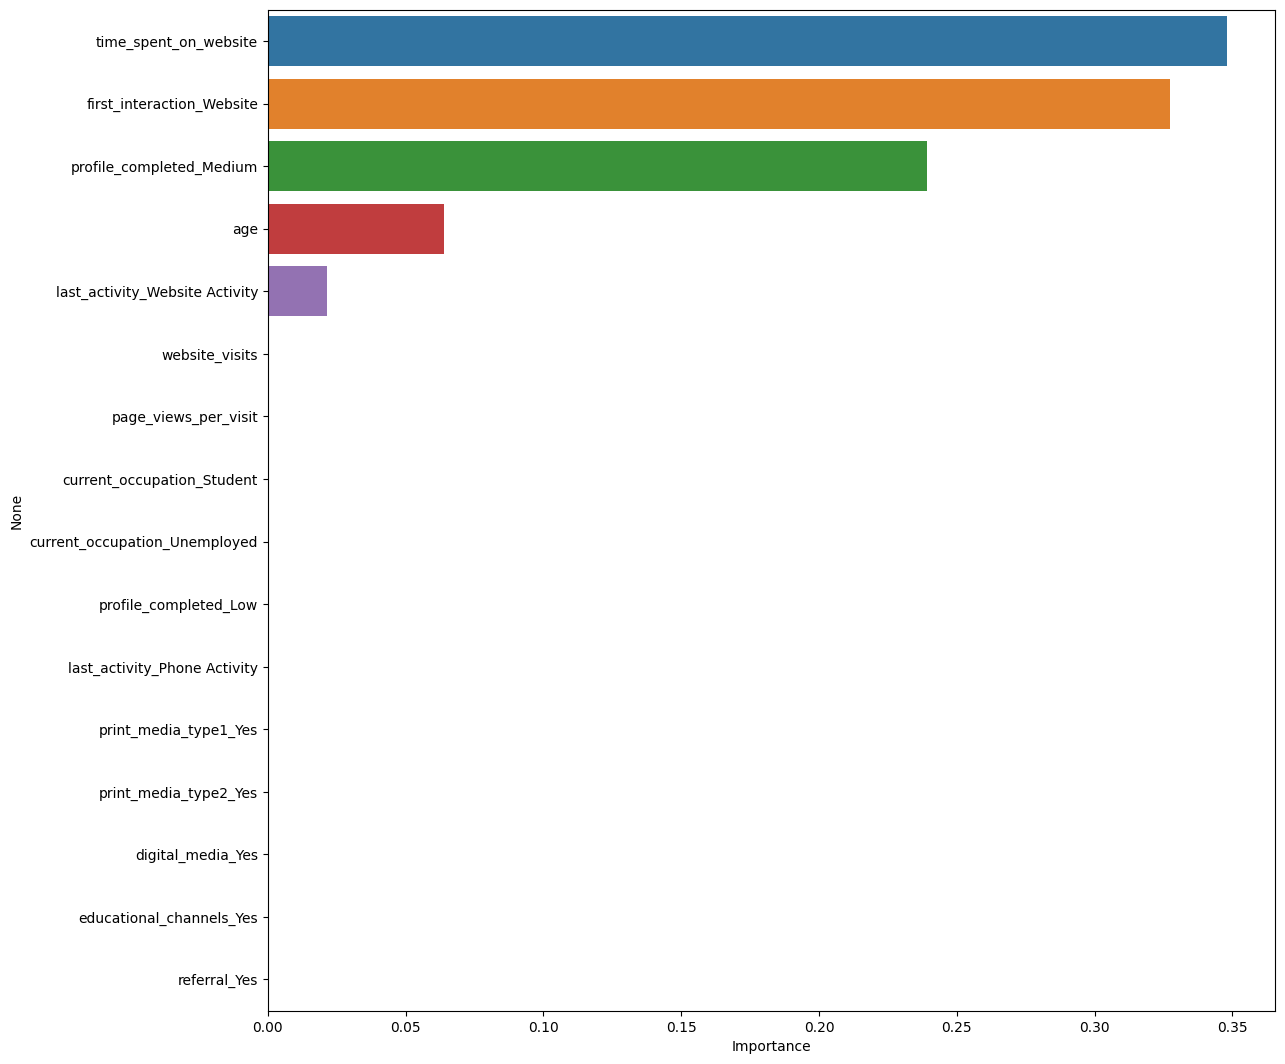

In [513]:
# We can see which features are most important to the model
importances = dt_tuned.feature_importances_
importance_df = pd.DataFrame(importances, index = X.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index, palette="tab10")
plt.show()

Observations:

We can see that in the pruned model, only time spent on the website, first interaction being on the website, the level of the profile completion, age, and last activity remain.

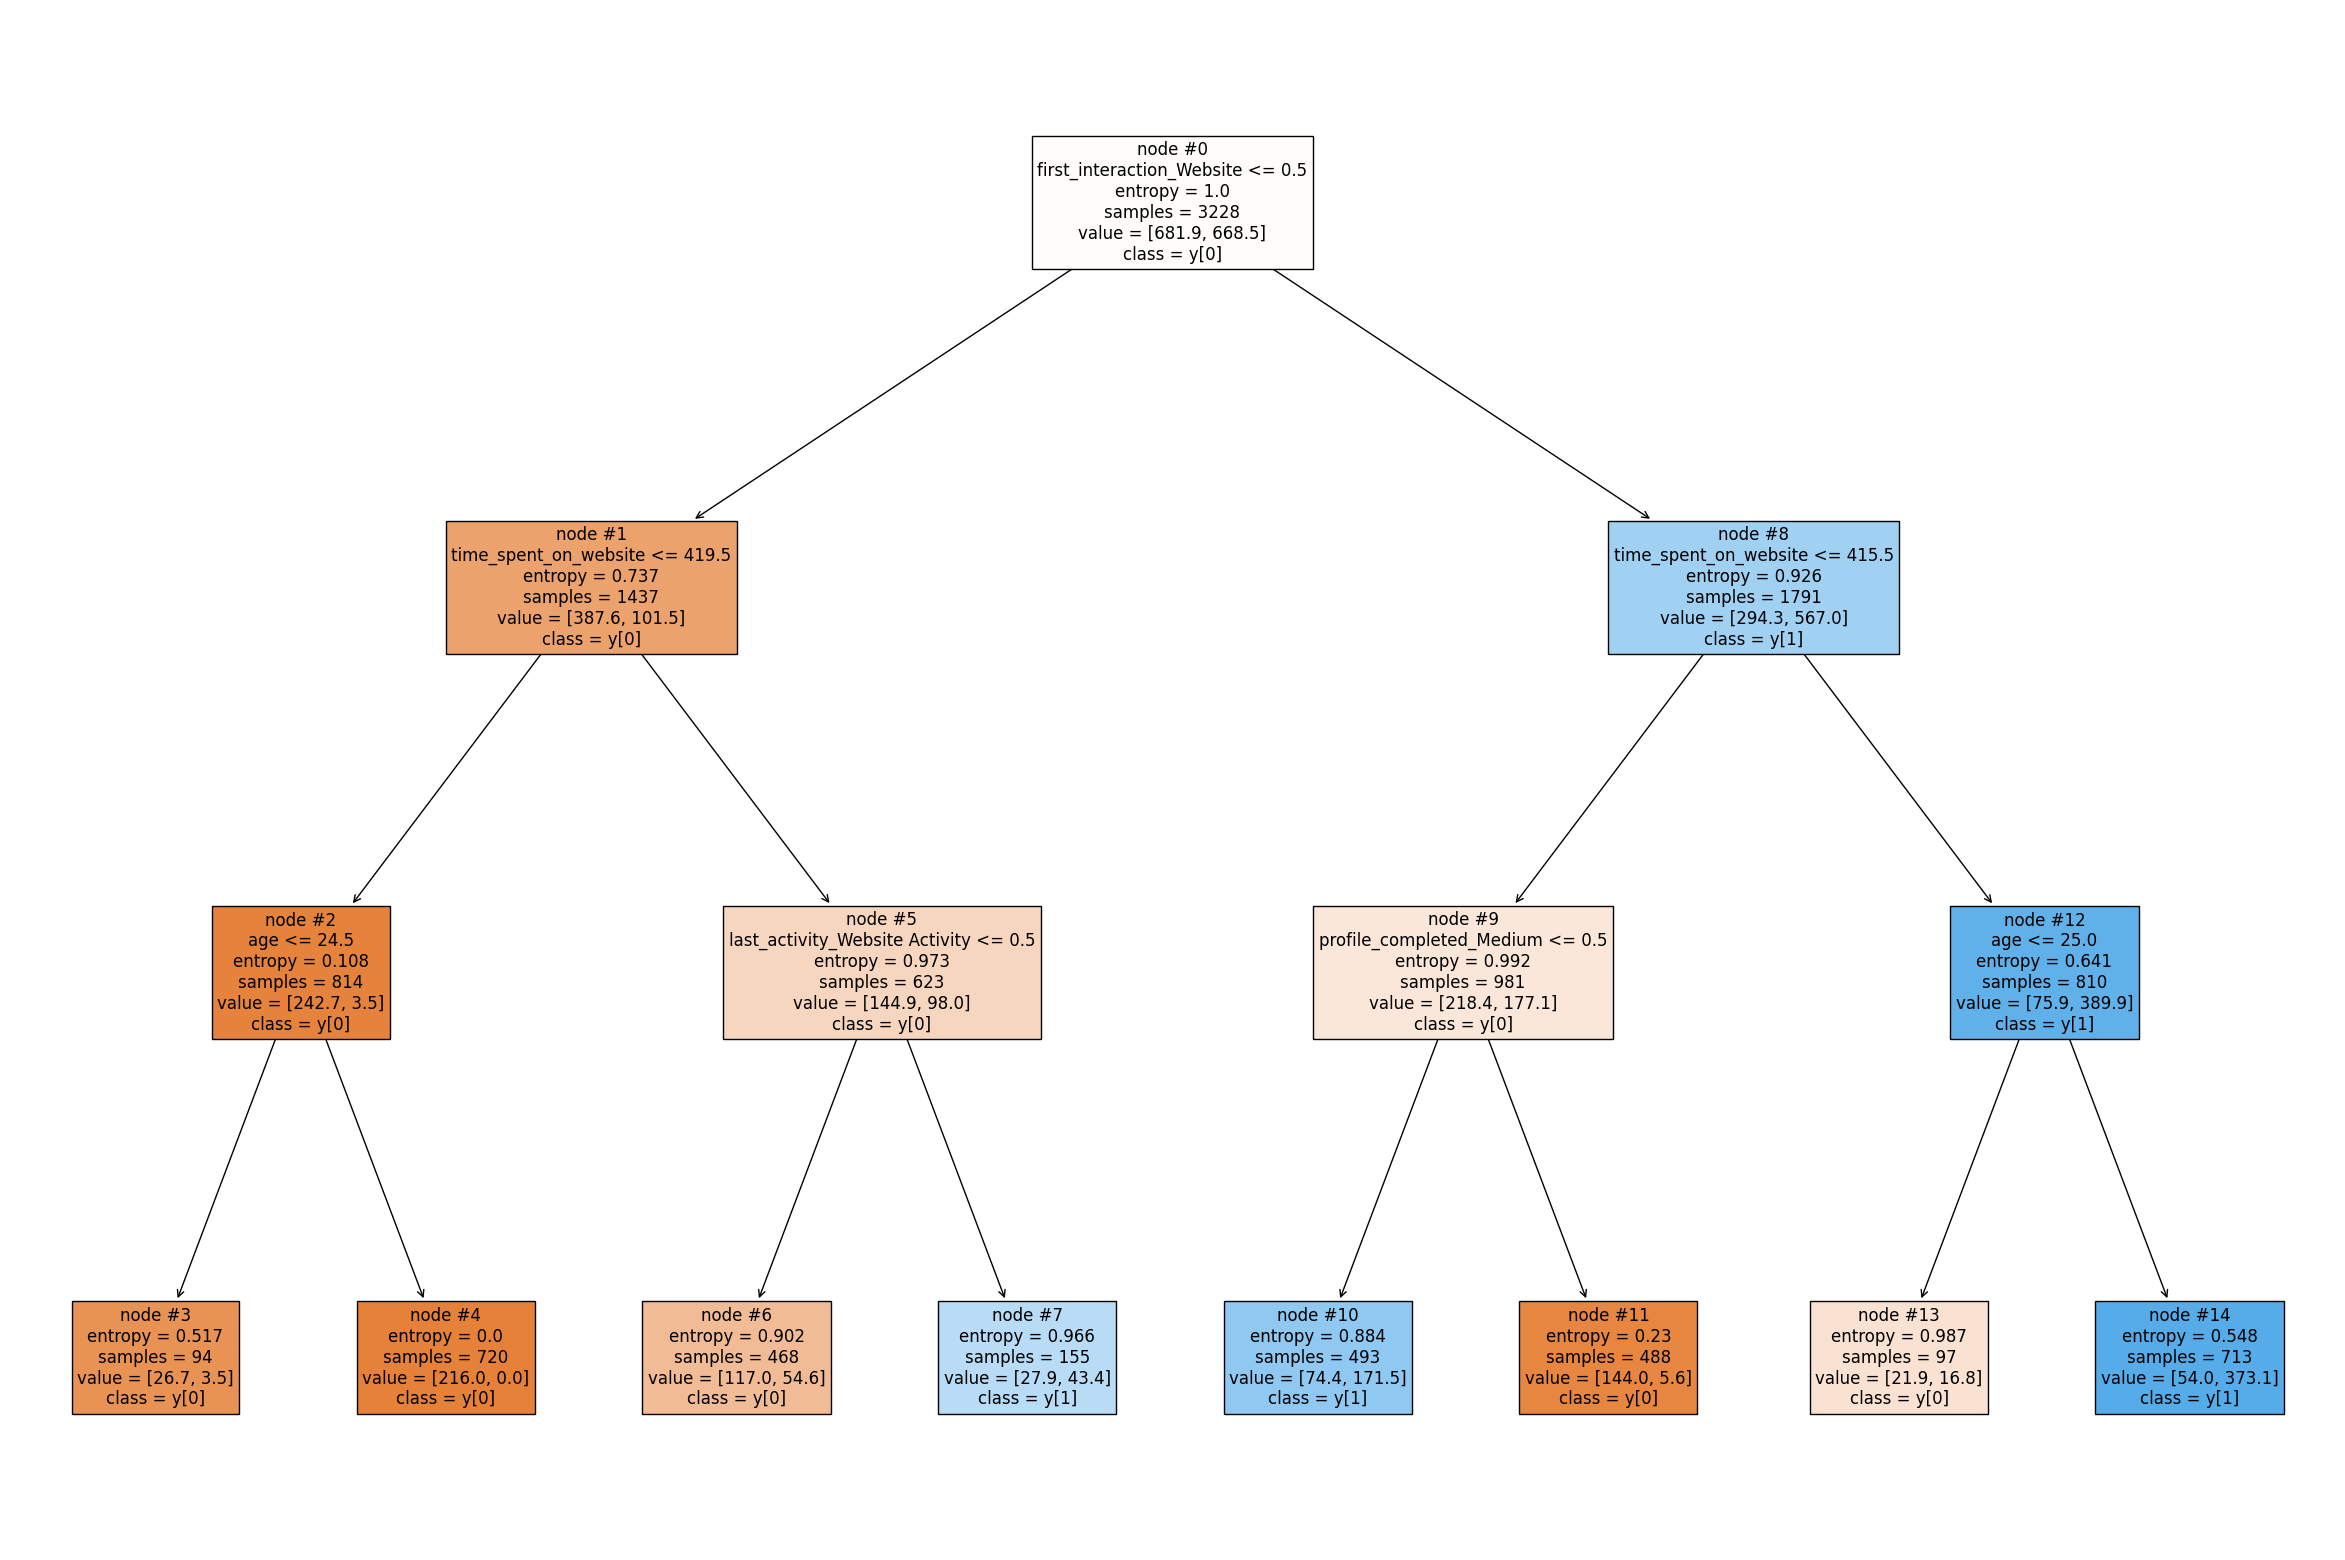

In [514]:
# Plot the decision tree model
plt.figure(figsize = (30, 20))
plot_tree(dt_tuned, max_depth = 4, feature_names = X.columns.tolist(), filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

We can see that the tree has been pruned to 14 total nodes.

## Building a Random Forest model

Next, we can build a random forest classifier to solve the same problem. A random forest uses the results of many individual decision trees and takes their average result to improve performance and reduce overfitting.

In [515]:
# Fitting the Random Forest classifier on the training data
rf = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 2)
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=2)

## Model Performance evaluation and improvement

We can again evaluate the model, focusing on the recall as it is most important to the problem at hand.

#### Training data:

In [516]:
Y_train_rf = rf.predict(X_train)

In [517]:
# Print the classification report
print(classification_report(Y_train,Y_train_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



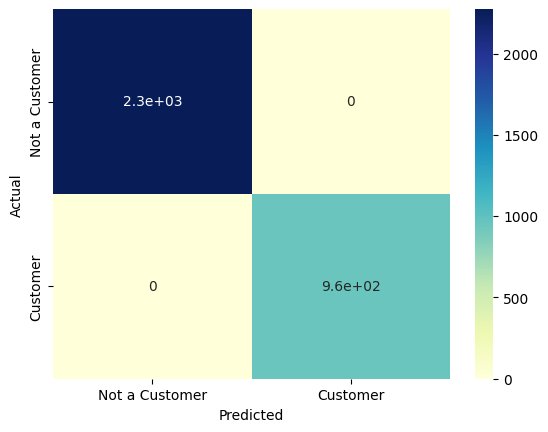

In [518]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(Y_train,Y_train_rf),annot=True,cmap='YlGnBu',xticklabels = ['Not a Customer', 'Customer'], yticklabels = ['Not a Customer', 'Customer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Observations:

The random forest classifier has perfect performance on the training dataset.

#### Test data:

In [519]:
Y_test_rf = rf.predict(X_test)

In [520]:
# Print the classification report
print(classification_report(Y_test,Y_test_rf))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.81      0.69      0.74       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.86      0.85      1384



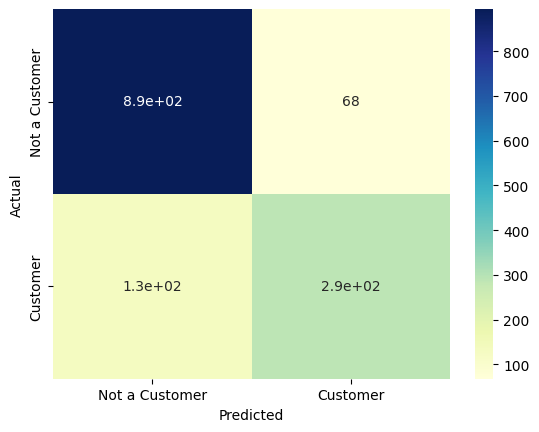

In [521]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(Y_test,Y_test_rf),annot=True,cmap='YlGnBu',xticklabels = ['Not a Customer', 'Customer'], yticklabels = ['Not a Customer', 'Customer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Observations:

The random forest model performs about as well as the single decision tree model on the train data. The value for the recall on the test data is 0.69.

### Random Forest Parameter tuning

We can again do some parameter tuning to improve the random forest model.

In [522]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1) # set the class weight to the proportion of the positive results in the data and weighing more heavily the positive results

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 120, 150],
              "max_depth": np.arange(4, 7),
              "criterion": ["gini", "entropy"],
              "min_samples_leaf": [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1) # since we are trying to minimize false negatives we can optimize the recall

# Run the grid search
gridCV = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, Y_train)

# Set the classifier to the best combination of parameters
rf_tuned = gridCV.best_estimator_

We can again check the model on the training data:

In [523]:
Y_train_rf_tuned = rf_tuned.predict(X_train)

In [524]:
# Print the classification report
print(classification_report(Y_train,Y_train_rf_tuned))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2273
           1       0.67      0.88      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



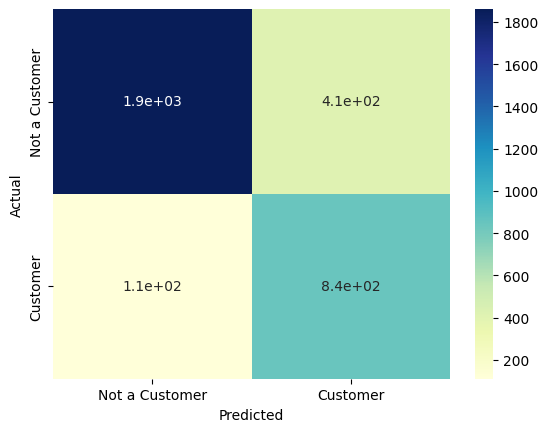

In [525]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(Y_train,Y_train_rf_tuned),annot=True,cmap='YlGnBu',xticklabels = ['Not a Customer', 'Customer'], yticklabels = ['Not a Customer', 'Customer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Once again, the tuning reduced the overfitting of the training data, and now we have a recall value of 0.88 on the training data. Next we can check the results on the test data.

In [526]:
Y_test_rf_tuned = rf_tuned.predict(X_test)

In [527]:
# Print the classification report
print(classification_report(Y_test,Y_test_rf_tuned))

              precision    recall  f1-score   support

           0       0.92      0.81      0.87       962
           1       0.67      0.85      0.75       422

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.81      1384
weighted avg       0.84      0.82      0.83      1384



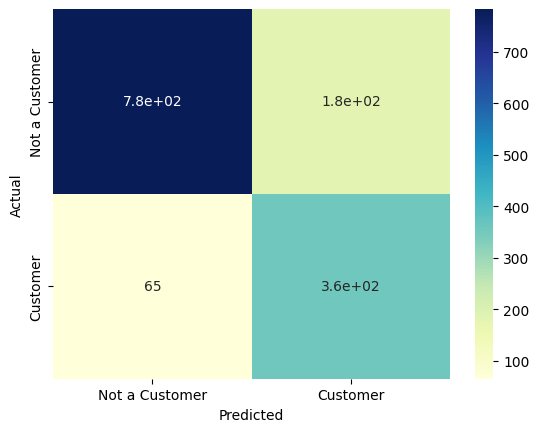

In [528]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(Y_test,Y_test_rf_tuned),annot=True,cmap='YlGnBu',xticklabels = ['Not a Customer', 'Customer'], yticklabels = ['Not a Customer', 'Customer'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We can see that the tuned model has a much better recall on the test data compared to the starting model, with a value of 0.85 compared to 0.69. It also performs comparatively on the train data and test data.

Finally, we can again look at the important features according to the tuned random forest classifier.

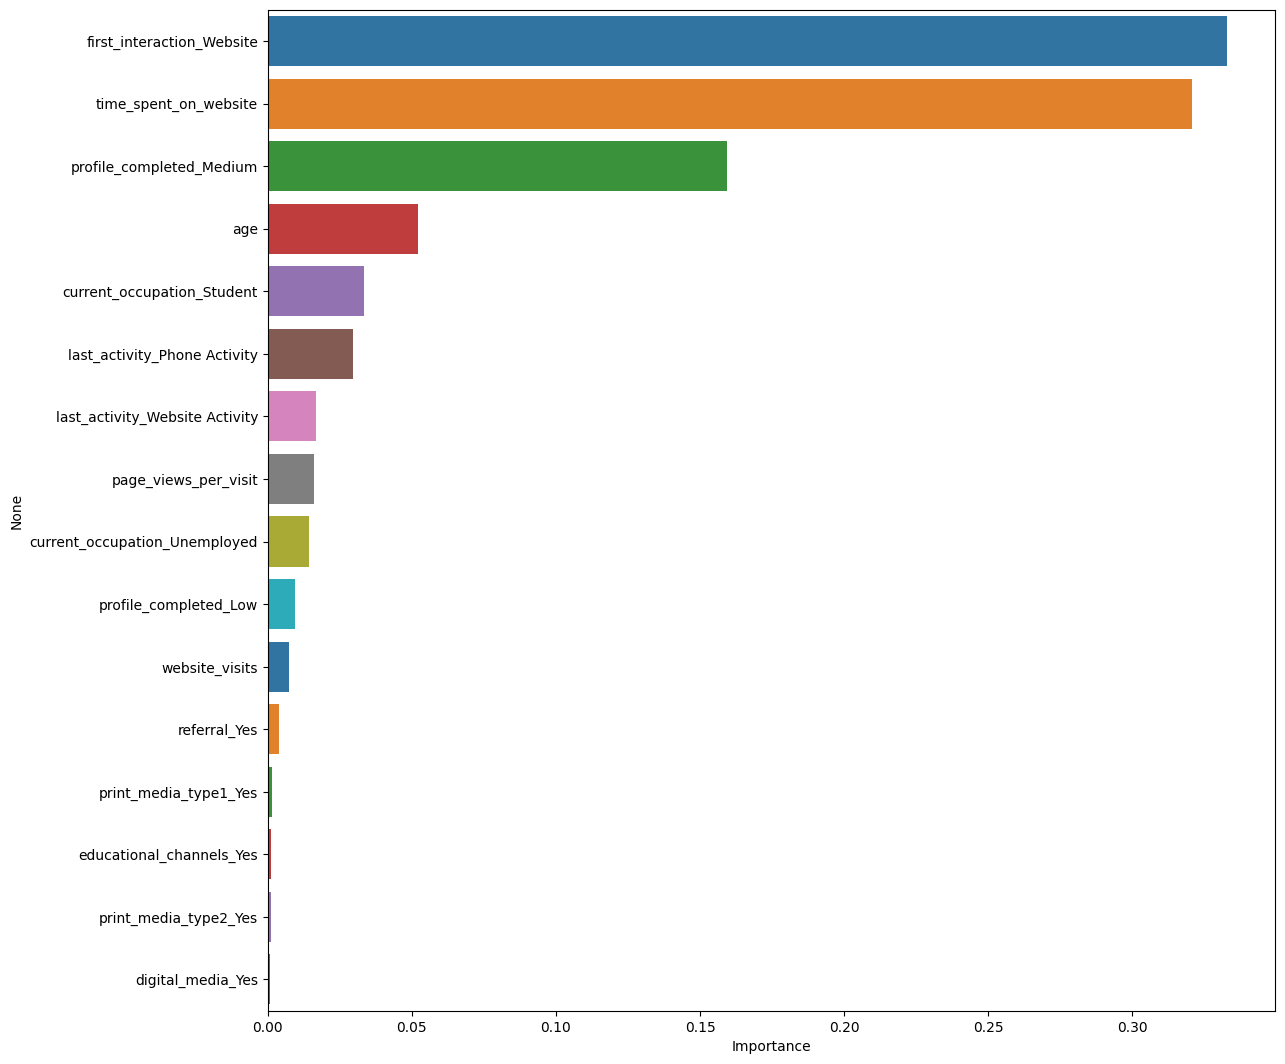

In [529]:
# We can see which features are most important to the model
importances = rf_tuned.feature_importances_
importance_df = pd.DataFrame(importances, index = X.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index, palette="tab10")
plt.show()

We can see that the most important feature according to the random forest classifier is the first interaction, which is the same as the first node in the tuned decision tree model. The time spent on the website is also once again a key feature as well as the level of completion of the profile and the age of the lead.

## Actionable Insights and Recommendations

Model Summary:

Finally, we can provide a summary of the performance of the different models for comparison:

In [530]:
# Final comparison of all recalls and accuracy
print("The value of the recall for the decision tree classifier is " + str(round(recall_score(Y_train,Y_train_predict),2)) + " on the training data and "+ str(round(recall_score(Y_test,Y_test_predict),2)) + " on the test data. The overall accuracy score on the test data for this model is "+ str(round(accuracy_score(Y_test,Y_test_predict),2)))
print("The value of the recall for the tuned decision tree classifier is " + str(round(recall_score(Y_train,Y_train_predict_tuned),2)) + " on the training data and "+ str(round(recall_score(Y_test,Y_test_predict_tuned),2)) + " on the test data. The overall accuracy score on the test data for this model is "+ str(round(accuracy_score(Y_test,Y_test_predict_tuned),2)))
print("The value of the recall for the random forest classifier is " + str(round(recall_score(Y_train,Y_train_rf),2)) + " on the training data and "+ str(round(recall_score(Y_test,Y_test_rf),2)) + " on the test data. The overall accuracy score on the test data for this model is "+ str(round(accuracy_score(Y_test,Y_test_predict_rf),2)))
print("The value of the recall for the tuned random forest classifier is " + str(round(recall_score(Y_train,Y_train_rf_tuned),2)) + " on the training data and "+ str(round(recall_score(Y_test,Y_test_rf_tuned),2)) + " on the test data. The overall accuracy score on the test data for this model is "+ str(round(accuracy_score(Y_test,Y_test_rf_tuned),2)))

The value of the recall for the decision tree classifier is 1.0 on the training data and 0.69 on the test data. The overall accuracy score on the test data for this model is 0.81
The value of the recall for the tuned decision tree classifier is 0.88 on the training data and 0.86 on the test data. The overall accuracy score on the test data for this model is 0.8
The value of the recall for the random forest classifier is 1.0 on the training data and 0.69 on the test data. The overall accuracy score on the test data for this model is 0.86
The value of the recall for the tuned random forest classifier is 0.88 on the training data and 0.85 on the test data. The overall accuracy score on the test data for this model is 0.82


We can see that both the tuned decision tree and tuned random forest classifiers have recall >80% on both the training data and test data. The tuned random forrest classifier shows the better overall accuracy. All models gave similar significant features which allows us to draw conclusions about the data.

### Recommendations:

Based on the data analysis as well as the decision tree and random forest classifier models, we can make the following recommendations to ExtraaLearn:
1. The first interaction happening through the website is probably the most significant single predictor for whether a lead will turn into a customer. This can be for a variety of reasons, but in the short term the company would be better served focusing on the leads that are introduced to the program through the website. In the long term, the company should strive to improve the user experience on the mobile app and strive to improve those outcomes.
2. A second key variable that is also just as important is the amount of time a user spends on the website, with the data pointing towards 500 seconds as a turning point. The company would be well served to make the more in depth features of the website more immediately accessible as it may be the case that only the users who dig a little deeper can find the valuable information.
3. A third key feature is the profile completion level, with even 50%-75% completed profiles showing incredible significance. The company should ensure that the profile completion process is as seamless as possible and doesn't require much effort on the side of the user.
4. The age and professional occupation of the lead are also important, with older professionals being much more likely to convert to customers. This suggests that the company can seek to create collaborate with businesses to offer the training programs to their employees, as well as consider a discounted rate for students to improve conversion rates among them.
5. The different advertising avenues do not seem to be very important for the classification models, and from the data we can see that the conversion outcomes for each type are similar. The company can consider stopping advertising in magazines, as that has the lowest reach and shift that budget to digital or newspaper advertisements which have wider reach or to other more impactful areas.
6. Lastly, the data on referrals shows a very high conversion rate, although the classification models do not consider that an area of high importance. This is probably due to the very small number of referrals, and so the company should consider adding some kind of incentive structure to encourage more users to refer others to the platform.